### 0.0、初始化

In [ ]:
import zwdx_minjiang as MJ
MJ.connect(qcsIp='192.168.1.180', qcsPort=8501, ctpIp='192.168.1.200')

MJ.set_result_path('TestResult')

# 设定设备默认采样率，ZW-QCS220-qcs220为XY轴控制、耦合控制设备
sampling = 8  #GHz, 默认采样率6Gsps
MJ.sample_rate_hz = sampling * 1e9
MJ.qcs220.setValue('DAC_Sampling', sampling, chn = 1) # 1~6 DA通道共用一个采样率
MJ.qcs220.setValue('DAC_Sampling', sampling, chn = 7) # 7~14 DA通道共用一个采样率
MJ.qcs220.setValue('DAC_Sampling', sampling, chn = 15) # 15~22 DA通道共用一个采样率

#设定DAC奈奎斯特域，normal（第一域），mix（第二域）
MJ.qcs220.setValue("Nyquist", "mix", chn = 1) # 1~6 DA通道共用一个奈奎斯特域设置
MJ.qcs220.setValue("Nyquist", "mix", chn = 7) # 7~14 DA通道共用一个奈奎斯特域设置
MJ.qcs220.setValue("Nyquist", "normal", chn = 14) # 15~22 DA通道共用一个奈奎斯特域设置

192.168.1.180:8501


In [2]:
MJ.env_para.update({
    'qubit':"Q33",
    'readin_wire_num':"18",   
    'readin_BPF_param':"6GHz-7GHz",
    'readout_wire_num':"19",  
    'readout_BPF_param':"6GHz-7GHz",  
    'readout_Att_param':"40dBm",  
    'readout_Amp_param':"power=12v, cur=0.1A, 50dBm",
    'XY_wire_num':"15",       
    'XY_BPF_param':"4.5GHz-5.5GHz",   
    'XY_Att_param':"20dBm",
    'Z_wire_num':"16",        
    'Z_Att_param':"10dBm",
})
MJ.test_para.update({
    "read_in_ch": 1,
    "read_in_pw":50e-9,
    "read_in_delay":0e-9, ##ns
    "read_out_ch": 1,
    "read_out_freq": 6500, ##MHz
    "read_out_pw":10e-6,
    "read_out_amp":1,
    "read_out_delay":0e-9,
    "xy_amp":1,
    "xy_ch":1,
    "xy_pw":47e-9,
    "xy_delay":46e-9,
    "xy_freq":6500,
    "xy_freq_offset":5,
    "xy_wave_type": 'DC',  ##GAUSS or DC
    "trig_ch":1,
    "trig_mode":0, #触发，1为外部触发，0为内部触发
    "trig_period":50, ##us
    "z_ch":15,
    "zbias":0.28,
    "shots":1000,
    "plot_pw": 20e-6,
})
MJ.trig_para.update({
    'trigger_source':0,   #触发来源，1为外部触发，0为内部触发
    'trigger_continue':0,  #内部触发连续触发模式，1开启，0关闭
    'trigger_block_en':1,
    'trigger_ref':0,
    'trigger_times':MJ.test_para['shots'],
    'trigger_us':MJ.test_para['trig_period'],  #内部触发周期，us
    'trigger_delay':0
})

#### 原始数据画波形

In [ ]:
MJ.test_para.update({"read_in_delay": 0e-9})
MJ.plot_row_data()

#### 测试1：延时标定

In [ ]:
MJ.test_para.update({"read_in_delay": {"start":0e-9, "end":800e-9, "step":10e-9},})
MJ.delay_test()   

#### 测试2：扫腔频

In [ ]:
MJ.test_para.update({"sweep_freq": {"start":6400, "end":6600, "step":10},
                     "read_in_delay": 250e-9})
MJ.sweep_cavity_freq()   

#### 测试3：扫描读取腔色散频移

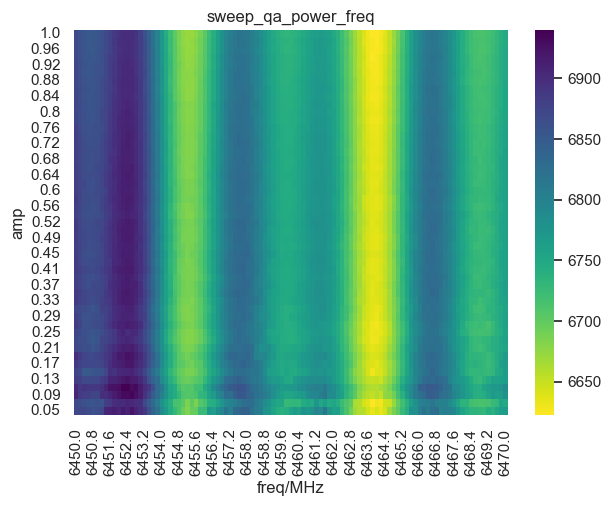

[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■] 100% 

In [4]:
MJ.test_para.update({"sweep_freq": {"start":6450, "end":6470, "step":0.2}, 
                     "sweep_amp":{"start":1, "end":0.05, "step":0.02},})
MJ.sweep_qa_power_freq() 

#### 测试4：Z偏置扫腔频

In [ ]:
MJ.test_para.update({"sweep_cavity_freq": {"start":6450, "end":6470, "step":1},
                     "sweep_z_amp":{"start":0, "end":-0.6, "step":0.03},})
MJ.sweep_zbias_cavity_freq() 

#### 测试5：细扫腔频

In [ ]:
MJ.test_para.update({"sweep_freq": {"start":6450, "end":6470, "step":0.1},})
MJ.sweep_cavity_freq_fine() 

#### 测试6：扫bit频率

In [ ]:
MJ.test_para.update({"sweep_xy_freq": {"start":6450, "end":6470, "step":0.1},})
MJ.sweep_bit_freq() 

#### 测试7：z偏置扫bit频率

In [ ]:
MJ.test_para.update({"sweep_xy_freq": {"start":6450, "end":6470, "step":1},
                     "sweep_z_amp":{"start":0, "end":-0.6, "step":0.05}, })
MJ.sweep_zbias_bit_freq()

#### 测试8：RABI幅度

In [ ]:
MJ.test_para.update({"sweep_xy_amp": {"start":0.01, "end":1, "step":0.01},})
MJ.rabi_amp()

#### 测试9：RABI脉宽

In [ ]:
MJ.test_para.update({"sweep_xy_pw": {"start":10e-9, "end":200e-9, "step":1e-9},})
MJ.rabi_pw() 

#### 测试10：T1测量

In [ ]:
MJ.test_para.update({"sweep_read_delay": {"start":0e-9, "end":3000e-9, "step":50e-9},})
MJ.t1_test()

#### 测试11：T2测量

In [ ]:
MJ.test_para.update({"sweep_t_delay": {"start":0e-9, "end":1000e-9, "step":15e-9},})
MJ.t2_test()     

In [ ]:
MJ.test_para.update({"sweep_t_delay": {"start":0e-9, "end":1000e-9, "step":15e-9},})
MJ.t2_spin_echo()

#### 测试12：01态保真度

In [ ]:
MJ.test_para.update({"01_state": 0,
                     "xy_amp_0state":0,    
                     "xy_amp_1state":0.2,  
                     "xy_amp_muxstate":0.2, })
MJ.qubit_fidelity()

#### 测试13：01态扫腔频

In [ ]:
MJ.test_para.update({"sweep_freq": {"start":6450, "end":6470, "step":1},})
MJ.sweep_qubit_cavity_freq()